In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jfazal","key":"320da1ccdffcf379d318a9eb2ae415a0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download vivek468/superstore-dataset-final
!unzip superstore-dataset-final.zip


Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 857MB/s]
Archive:  superstore-dataset-final.zip
  inflating: Sample - Superstore.csv  


In [7]:
import pandas as pd

data = pd.read_csv('Sample - Superstore.csv', encoding='latin1')

data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
# See the column names and data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
# Look at some basic statistics for numeric columns
data.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Check if there are any missing values
data.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [11]:
import sqlite3

conn = sqlite3.connect('superstore.db')
data.to_sql('Orders', conn, if_exists='replace', index=False)


9994

In [12]:
query = '''
SELECT Region, SUM(Sales) AS Total_Sales
FROM Orders
GROUP BY Region
'''

region_sales = pd.read_sql_query(query, conn)
region_sales


,Region,Total_Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


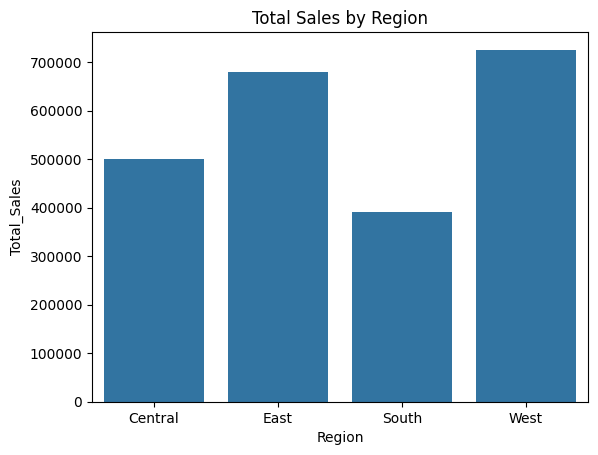

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Region', y='Total_Sales', data=region_sales)
plt.title('Total Sales by Region')
plt.show()


In [20]:
query = """
SELECT "Product Name", SUM(Sales) AS Total_Sales
FROM Orders
GROUP BY "Product Name"
ORDER BY Total_Sales DESC
LIMIT 5
"""

top_products = pd.read_sql_query(query, conn)
print(top_products)


                                        Product Name  Total_Sales
0              Canon imageCLASS 2200 Advanced Copier    61599.824
1  Fellowes PB500 Electric Punch Plastic Comb Bin...    27453.384
2  Cisco TelePresence System EX90 Videoconferenci...    22638.480
3       HON 5400 Series Task Chairs for Big and Tall    21870.576
4         GBC DocuBind TL300 Electric Binding System    19823.479


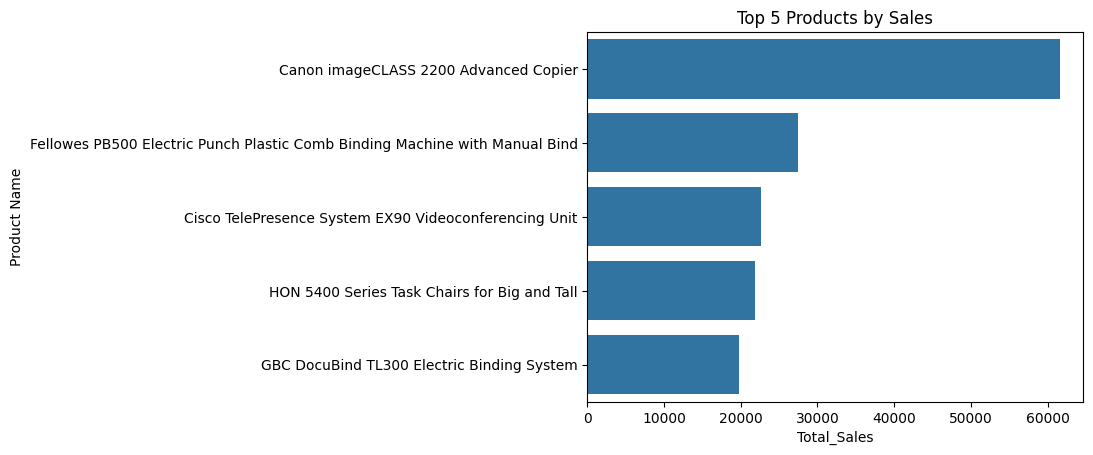

In [24]:
sns.barplot(x='Total_Sales', y='Product Name', data=top_products)
plt.title('Top 5 Products by Sales')
plt.show()


In [21]:
query = """
SELECT Category, SUM(Sales) AS Total_Sales
FROM Orders
GROUP BY Category
ORDER BY Total_Sales DESC
"""

category_sales = pd.read_sql_query(query, conn)
print(category_sales)


          Category  Total_Sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


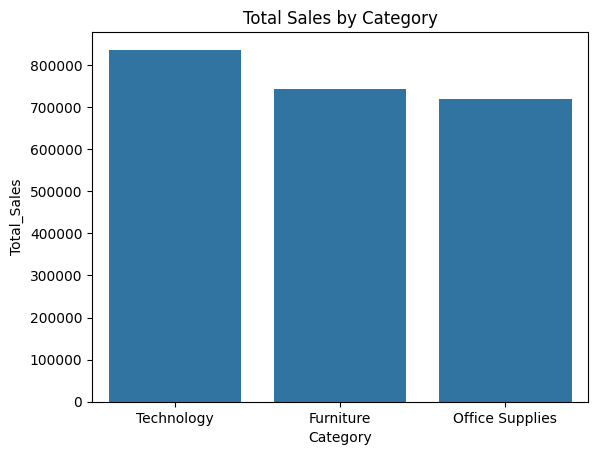

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Category', y='Total_Sales', data=category_sales)
plt.title('Total Sales by Category')
plt.show()


In [25]:
query = """
SELECT Region, SUM(Profit) AS Total_Profit
FROM Orders
GROUP BY Region
ORDER BY Total_Profit DESC
"""

profit_region = pd.read_sql_query(query, conn)
print(profit_region)


    Region  Total_Profit
0     West   108418.4489
1     East    91522.7800
2    South    46749.4303
3  Central    39706.3625


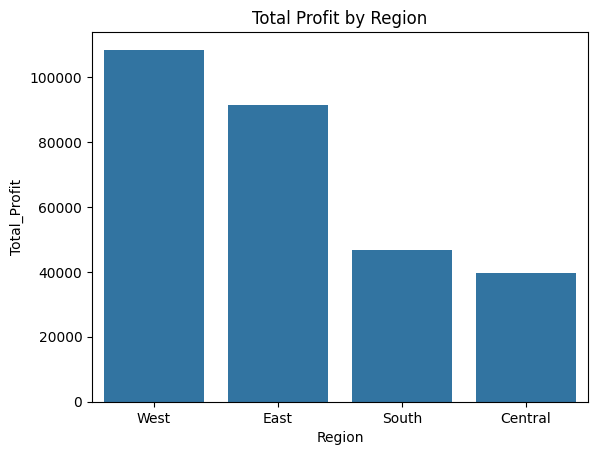

In [26]:
sns.barplot(x='Region', y='Total_Profit', data=profit_region)
plt.title('Total Profit by Region')
plt.show()


In [27]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
# Update the SQL table with the corrected date column
data.to_sql('Orders', conn, if_exists='replace', index=False)


9994

In [28]:
query = """
SELECT strftime('%Y-%m', "Order Date") AS YearMonth, SUM(Sales) AS Total_Sales
FROM Orders
GROUP BY YearMonth
ORDER BY YearMonth
"""

sales_trends = pd.read_sql_query(query, conn)
print(sales_trends)


   YearMonth  Total_Sales
0    2014-01   14236.8950
1    2014-02    4519.8920
2    2014-03   55691.0090
3    2014-04   28295.3450
4    2014-05   23648.2870
5    2014-06   34595.1276
6    2014-07   33946.3930
7    2014-08   27909.4685
8    2014-09   81777.3508
9    2014-10   31453.3930
10   2014-11   78628.7167
11   2014-12   69545.6205
12   2015-01   18174.0756
13   2015-02   11951.4110
14   2015-03   38726.2520
15   2015-04   34195.2085
16   2015-05   30131.6865
17   2015-06   24797.2920
18   2015-07   28765.3250
19   2015-08   36898.3322
20   2015-09   64595.9180
21   2015-10   31404.9235
22   2015-11   75972.5635
23   2015-12   74919.5212
24   2016-01   18542.4910
25   2016-02   22978.8150
26   2016-03   51715.8750
27   2016-04   38750.0390
28   2016-05   56987.7280
29   2016-06   40344.5340
30   2016-07   39261.9630
31   2016-08   31115.3743
32   2016-09   73410.0249
33   2016-10   59687.7450
34   2016-11   79411.9658
35   2016-12   96999.0430
36   2017-01   43971.3740
37   2017-02

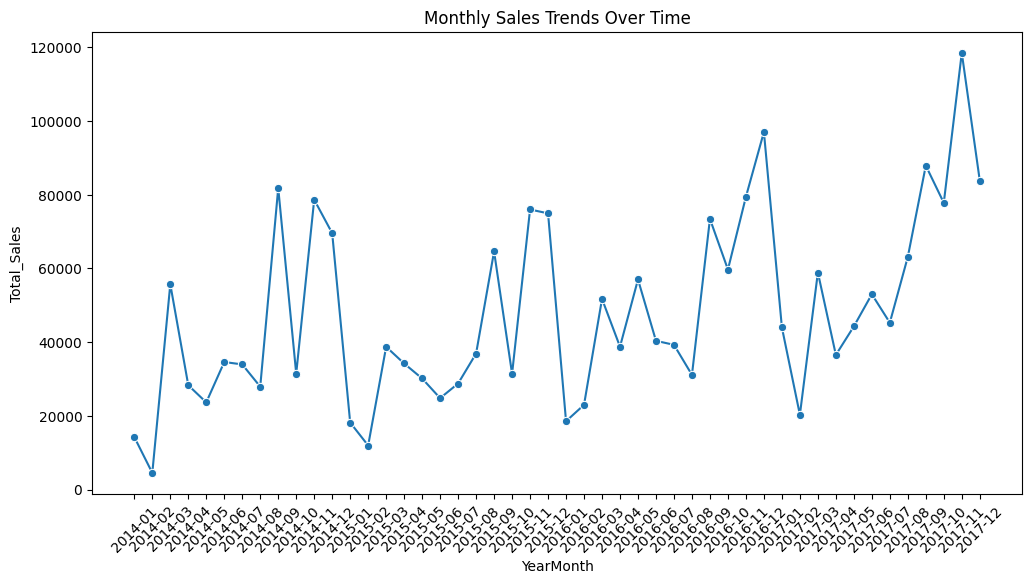

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='Total_Sales', data=sales_trends, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trends Over Time')
plt.show()
